# Lead Scoring Case Study

### Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Athough X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


#### Goals of the case Study: 

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Step 1: Reading and Understanding the Data

Let us first import the required libraries and read the dataset

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#### Now we will read the data from the csv file

In [3]:
leads = pd.read_csv('/Users/Shivam/Downloads/Lead Scoring Assignment/Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Check the shape of the dataframe
leads.shape

(9240, 37)

So, the leads dataframe has 9240 rows and 37 columns. Let's inspect some othe aspects as well.

In [5]:
# Info about the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the numerical aspects of the data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking the null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Here, we see that lot of columns are having a significant amount of null values.

In [8]:
# Checking the percentage of null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Sorting them to get better readability
round(100*(leads.isnull().sum()/len(leads.index)),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

# Step 2: Data Cleaning And Data Preparation

In [10]:
# Lets replace 'Select' with NaN
leads = leads.replace('Select', np.nan)

We can see, there are many 'Select" values present in the columns. We have converted it to 'NaN' because the user did not selected any option and 'Select' will be as good as 'NaN'

In [11]:
# Again checking the percentage of null values
round(100*(leads.isnull().sum()/len(leads.index)),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### Now we will drop the columns having 45% or more missing values 

In [12]:
leads = leads.loc[:, leads.isnull().sum()/len(leads)*100 <=45]

In [13]:
leads.shape

(9240, 30)

In [14]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


Here, we can see that Prosect ID and Lead Number are unique values assigned to a contacted user. So, we can drop one of them also. Here, we drop Prospect ID

In [15]:
# Checking the percetage null values again
round(100*(leads.isnull().sum()/len(leads.index)),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

### Some of the columns still have high Null value. Now, we will check them and deal with them accordingly

##### City Column

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

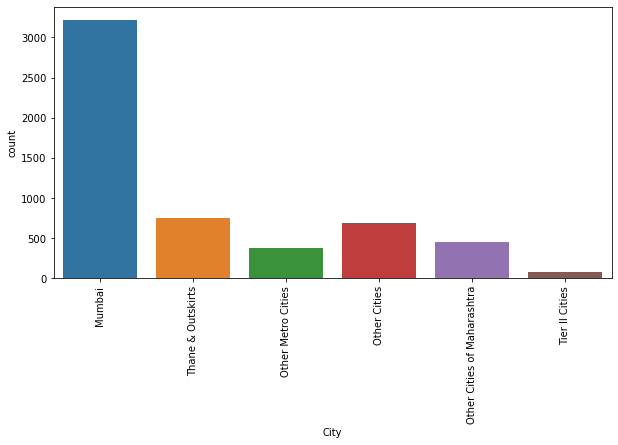

In [16]:
# City Column has around 40% missing values. Lets plot its countplot

plt.figure(figsize=(10,5))
sns.countplot(leads['City'])
plt.xticks(rotation=90)

In [17]:
round(leads['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

We see, most of the time the City is Mumbai. So we can replce the missing value with Mumbai

In [18]:
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

##### Specialization Column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

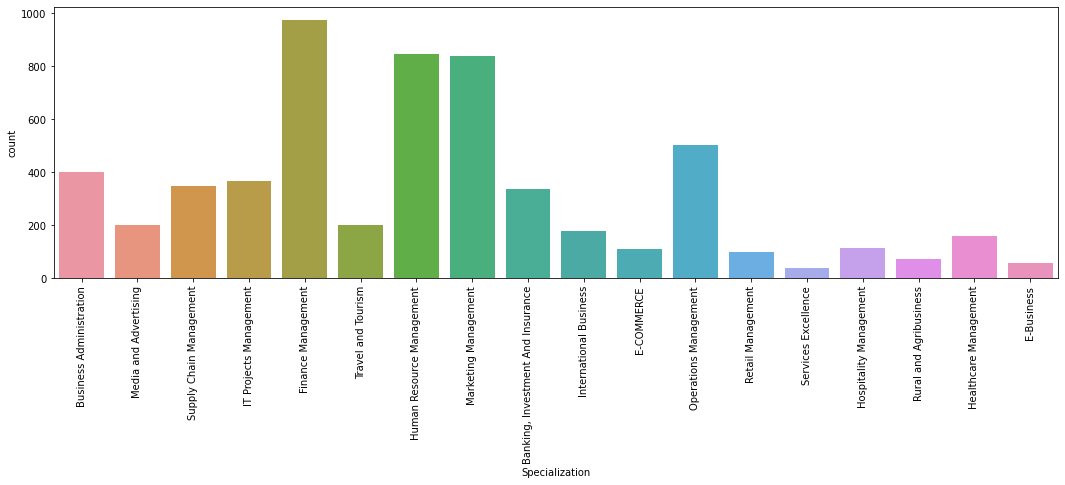

In [19]:
# Specialization column has aorund 37% missing values
plt.figure(figsize=(18,5))
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)

The reason behind the 37% missing values is might be the user does not have any specialization or the user may be a student. So, we will create another category 'Others' to replace the missing values

In [20]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

##### Tags Column 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

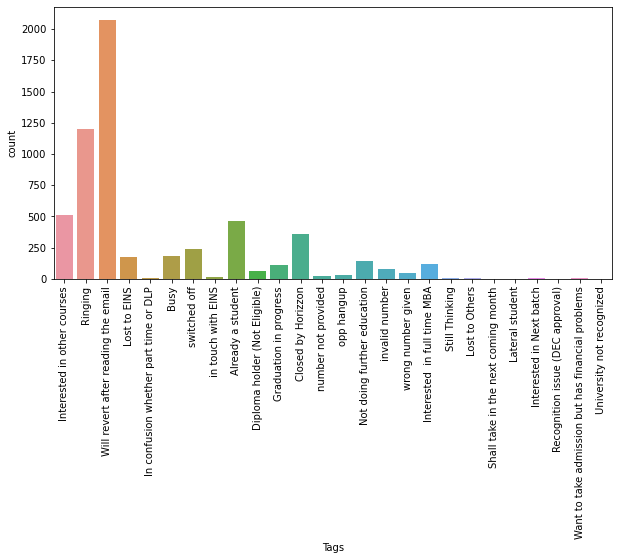

In [21]:
# Tags Column has around 36% missing values
plt.figure(figsize=(10,5))
sns.countplot(leads['Tags'])
plt.xticks(rotation=90)

We will replace the missing values with 'Will rever after reading the email', because it occurs most frequrntly

In [22]:
leads['Tags'] = leads['Tags'].replace(np.nan, 'Will revert after reading the email')

##### 'What matters most to you in choosing a course' Column

This column ha around 29% missing values

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

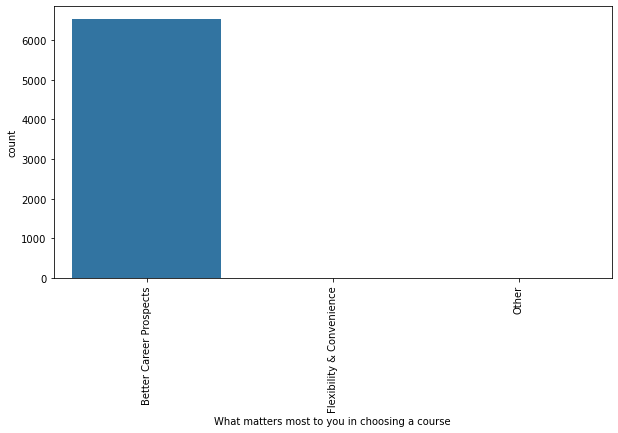

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [24]:
# We will replace missing values with 'Better Carrer Prospects'
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

##### 'What is your current occupation' Column

This column has around 29%  missing values

In [25]:
round(leads['What is your current occupation'].value_counts(normalize=True), 2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Since the Unemployed value has highest occuring, we can replace it by missing values

In [26]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

##### 'Country' Column 

This column has around 27% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

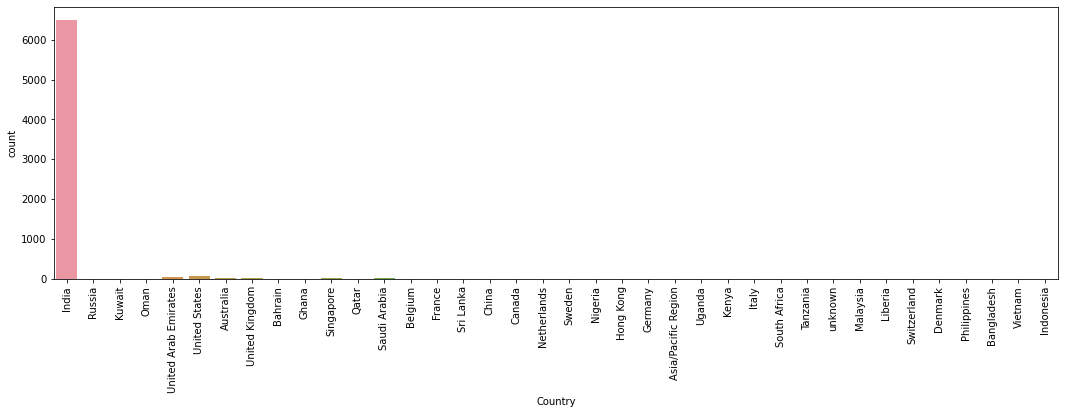

In [27]:
plt.figure(figsize=(18,5))
sns.countplot(leads['Country'])
plt.xticks(rotation=90)

Here we see that most of the values is India. So we can replace it with missing values

In [28]:
leads['Country'] = leads['Country'].replace(np.nan, 'India')

##### Now, rest of the columns have missing values less than 2%. So, we will drop the rows having null values.

In [29]:
leads.dropna(inplace=True)

In [30]:
# Checking for the null value percenatge

round(100*(leads.isnull().sum()/len(leads.index)),2).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

Now, there are no missing values in the data

# Step 3: Data Visualization
# EDA

In [31]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

#### The target variable for us is 'Converted'.  

In [32]:
# Let's see what is the conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

Here, we see about 38% of the leads get converted

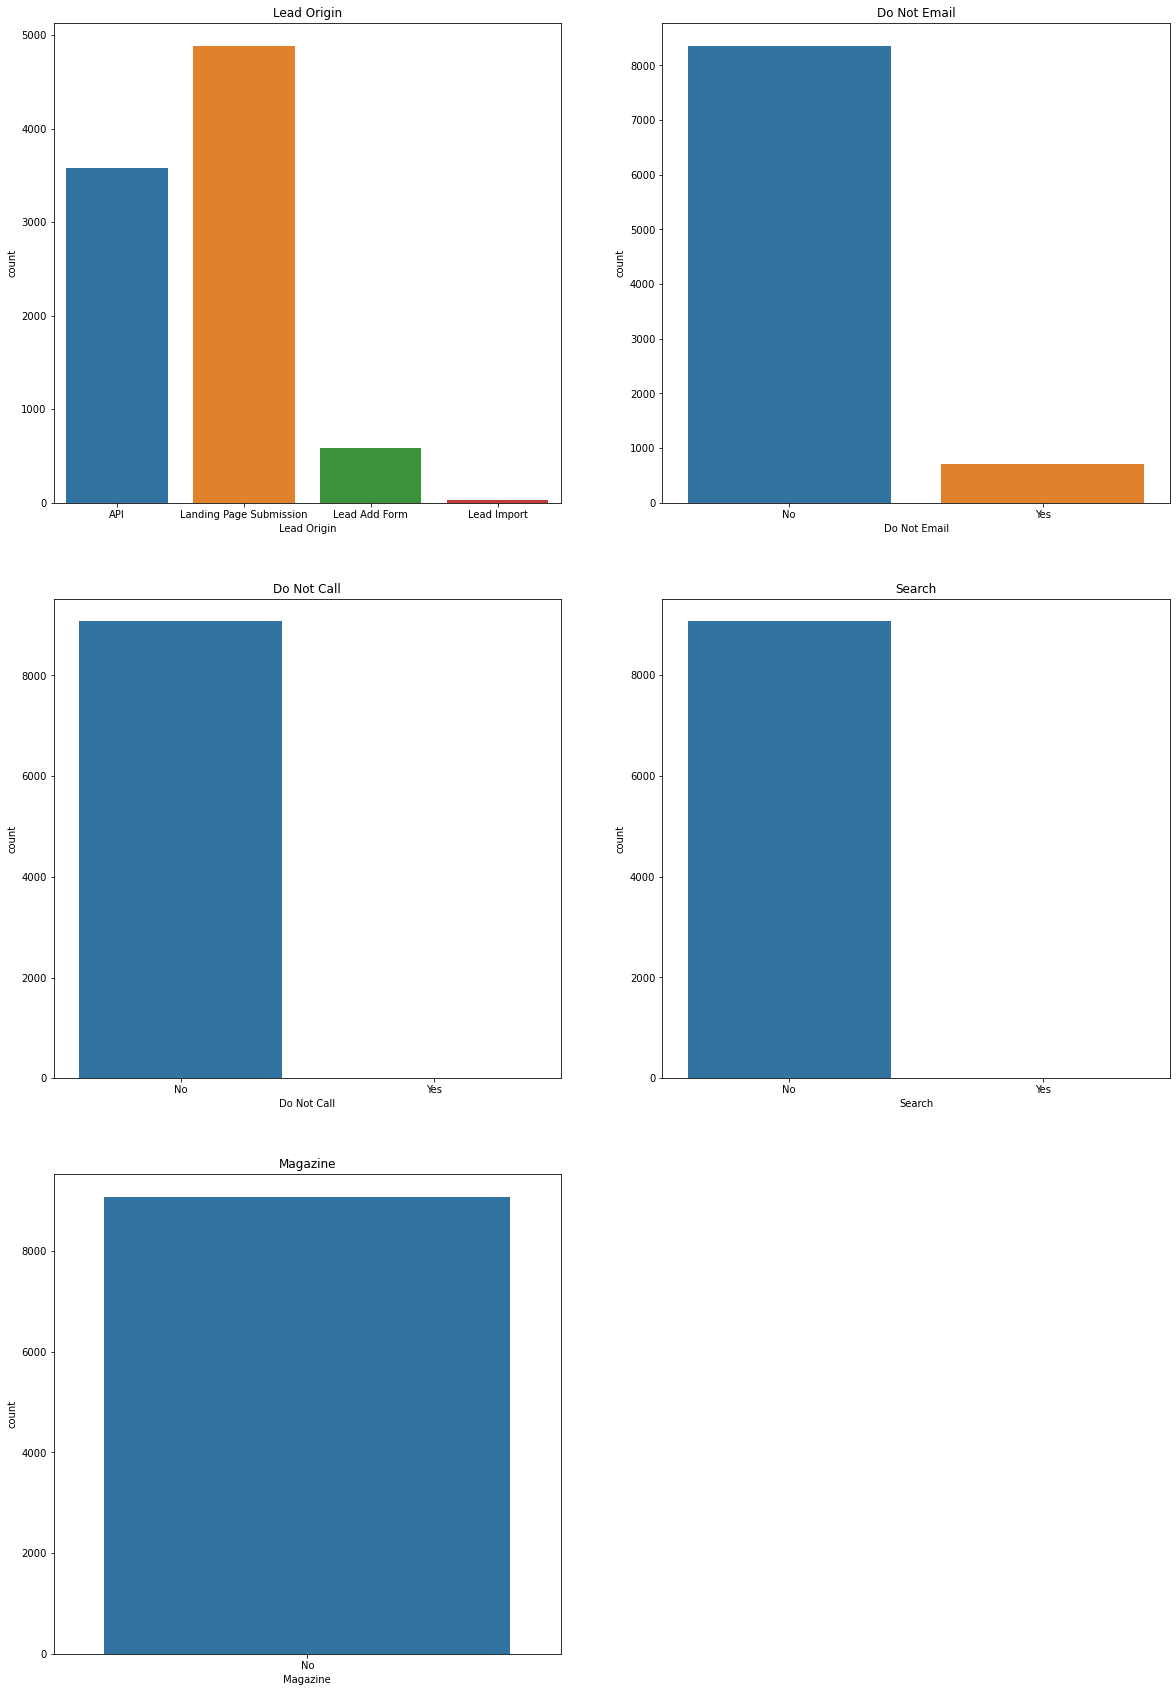

In [33]:
plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(3,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(3,2,3)
sns.countplot(leads['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(3,2,4)
sns.countplot(leads['Search'])
plt.title('Search')

plt.subplot(3,2,5)
sns.countplot(leads['Magazine'])
plt.title('Magazine')


plt.show()


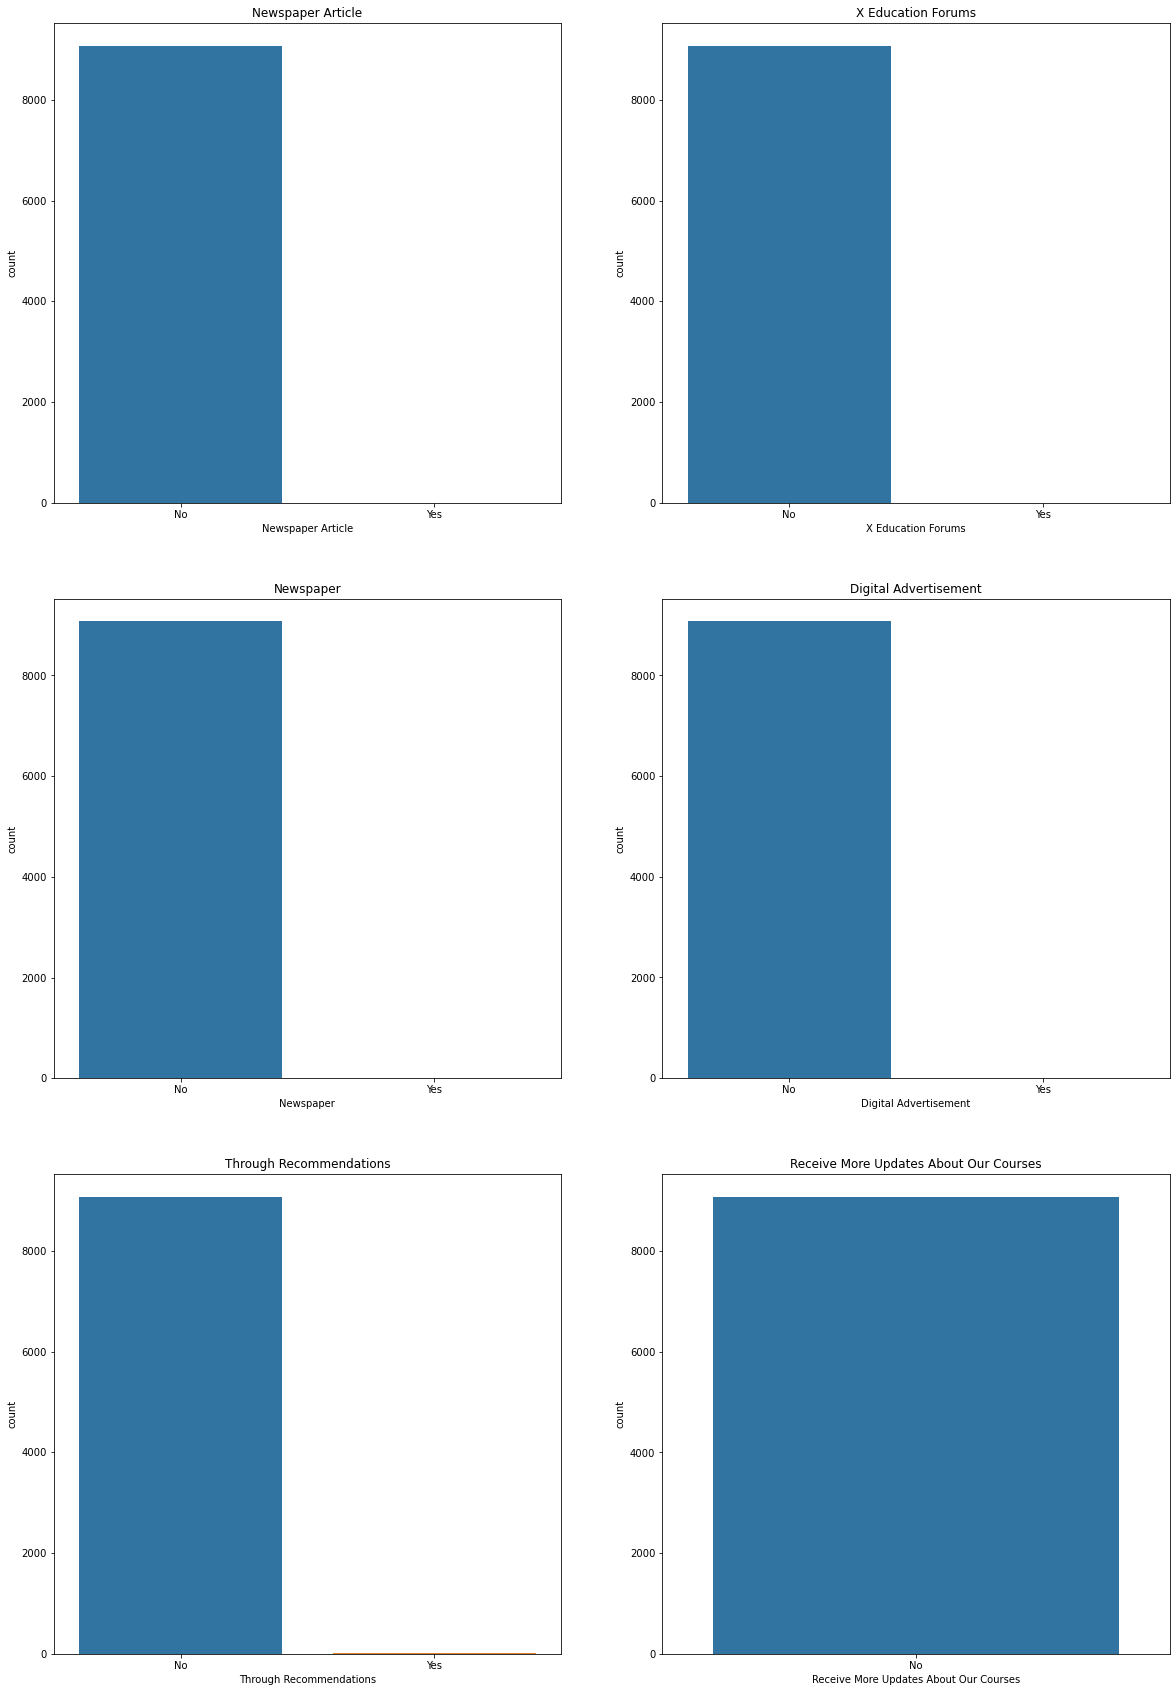

In [34]:
plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
sns.countplot(leads['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(3,2,2)
sns.countplot(leads['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(3,2,3)
sns.countplot(leads['Newspaper'])
plt.title('Newspaper')

plt.subplot(3,2,4)
sns.countplot(leads['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(3,2,5)
sns.countplot(leads['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(3,2,6)
sns.countplot(leads['Receive More Updates About Our Courses'])
plt.title('Receive More Updates About Our Courses')

plt.show()


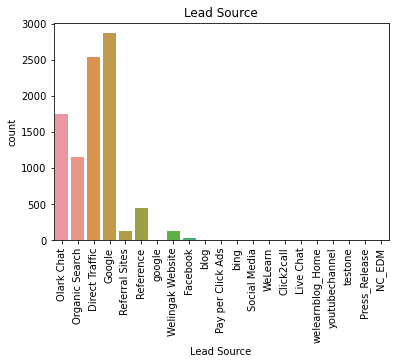

In [35]:
sns.countplot(leads['Lead Source']).tick_params(axis='x', rotation=90)
plt.title('Lead Source')
plt.show()

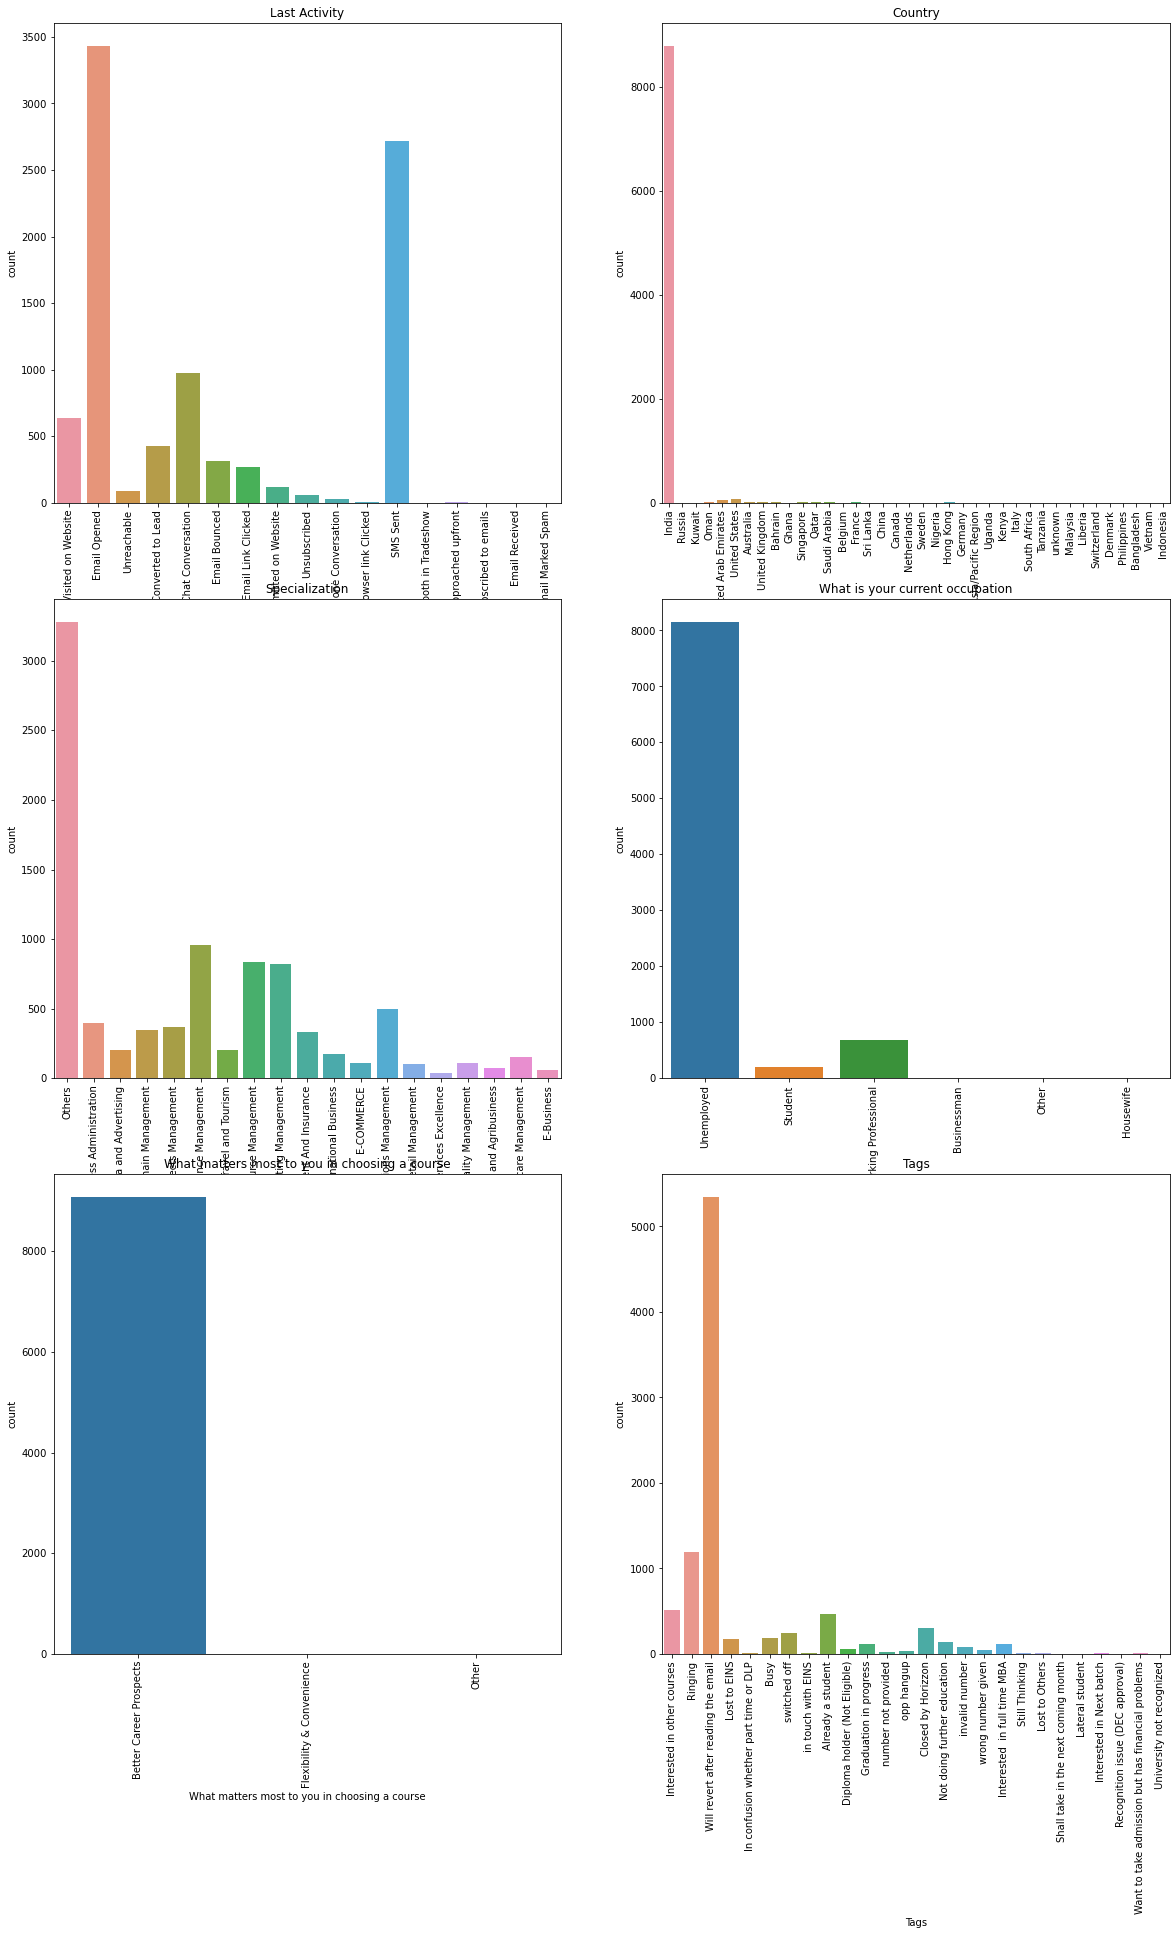

In [36]:
plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
sns.countplot(leads['Last Activity']).tick_params(axis='x', rotation=90)
plt.title('Last Activity')

plt.subplot(3,2,2)
sns.countplot(leads['Country']).tick_params(axis='x', rotation=90)
plt.title('Country')

plt.subplot(3,2,3)
sns.countplot(leads['Specialization']).tick_params(axis='x', rotation=90)
plt.title('Specialization')

plt.subplot(3,2,4)
sns.countplot(leads['What is your current occupation']).tick_params(axis='x', rotation=90)
plt.title('What is your current occupation')

plt.subplot(3,2,5)
sns.countplot(leads['What matters most to you in choosing a course']).tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(3,2,6)

sns.countplot(leads['Tags']).tick_params(axis='x', rotation=90)
plt.title('Tags')
plt.show()

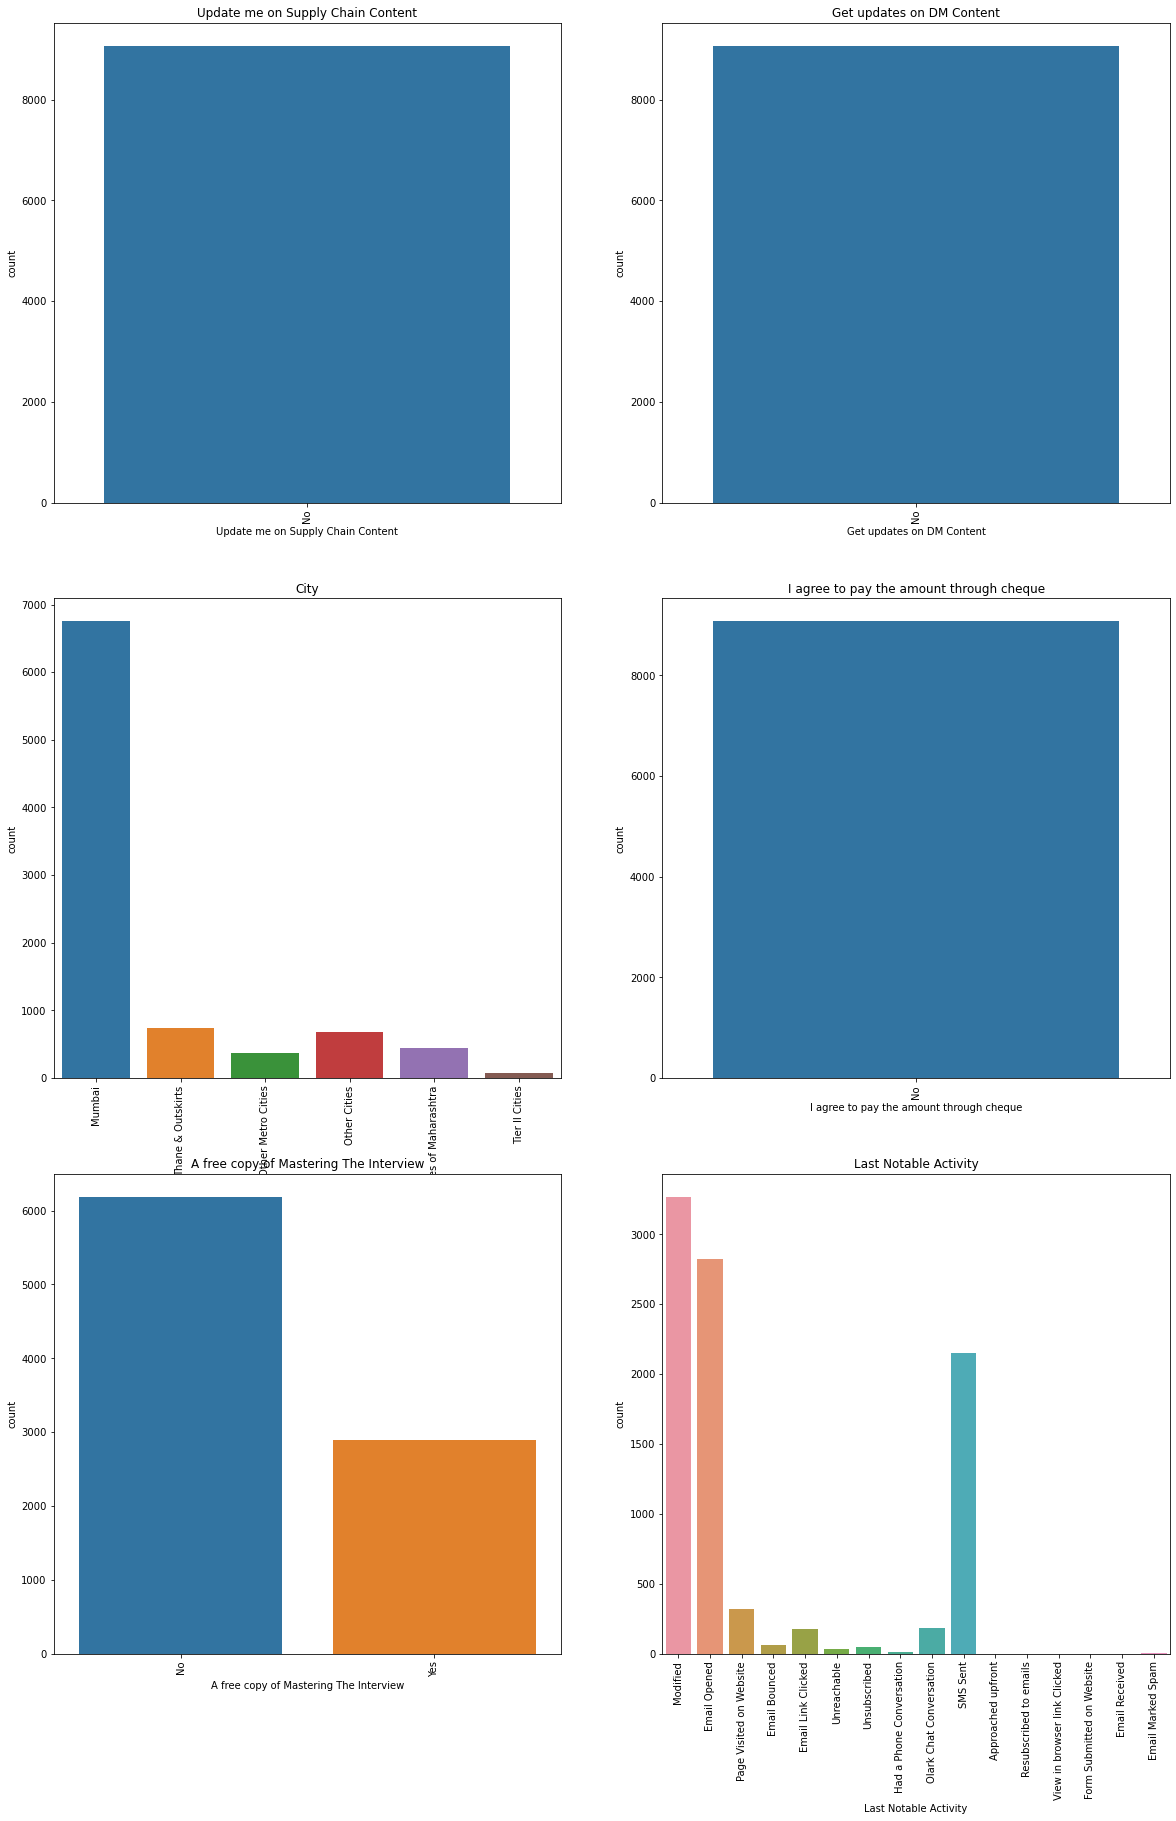

In [37]:
plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
sns.countplot(leads['Update me on Supply Chain Content']).tick_params(axis='x', rotation=90)
plt.title('Update me on Supply Chain Content')

plt.subplot(3,2,2)
sns.countplot(leads['Get updates on DM Content']).tick_params(axis='x', rotation=90)
plt.title('Get updates on DM Content')

plt.subplot(3,2,3)
sns.countplot(leads['City']).tick_params(axis='x', rotation=90)
plt.title('City')

plt.subplot(3,2,4)
sns.countplot(leads['I agree to pay the amount through cheque']).tick_params(axis='x', rotation=90)
plt.title('I agree to pay the amount through cheque')

plt.subplot(3,2,5)
sns.countplot(leads['A free copy of Mastering The Interview']).tick_params(axis='x', rotation=90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(3,2,6)

sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation=90)
plt.title('Last Notable Activity')
plt.show()

## Now, let's visualize and make inferences from each column w.r.t target variable 'Converted' 

### Visualizing Categorical Variables 

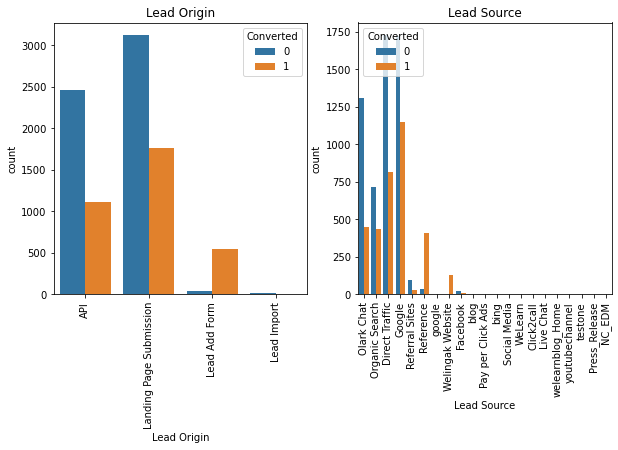

In [38]:
# First, we will visualize 'Lead Origin', 'Lead Source'

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Lead Source')
plt.show()

##### Inference: 

From 'Lead Origin' we can infer that:
* API and Landing Page Submission has higher count of leads and conversion rate.
* Lead Add Form has high conersion rate but low count of leads.
* Lead Import give nothing conclusive.
* To improve the conversion rate, the company should focus on conversions from API and Landing Page Submission,
  and try to generate more leads from Lead Add Form.


From 'Lead Source' we can infer that:
* Google and Direct traffic generates maximum leads.
* welingak website also has high conversion rate.
* To improve the conversion rate, company should focus on conversions from google, direct traffic,
  olark chat, organic search and welingak.

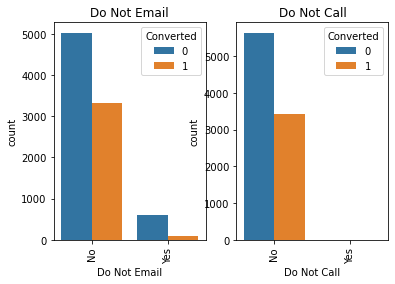

In [39]:
# Let's visualiae 'Do Not Email' and 'Do Not Call'
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Do Not Call')
plt.show()

##### Inference: 

Since more tha 90% of the values belongs to one category, nothing conclusive can be inferred from the two variables.

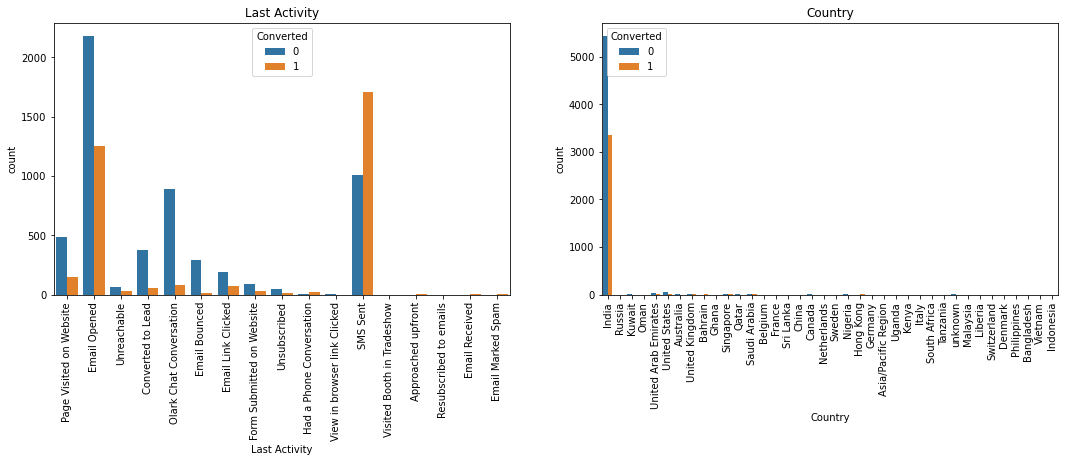

In [40]:
# Now, visualizing 'Last Activity' and 'Country'
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Country')
plt.show()

##### Inference: 

* Email Opened and SMS Sent is the Last activity for most of the leads.
* Most of the values are from India.

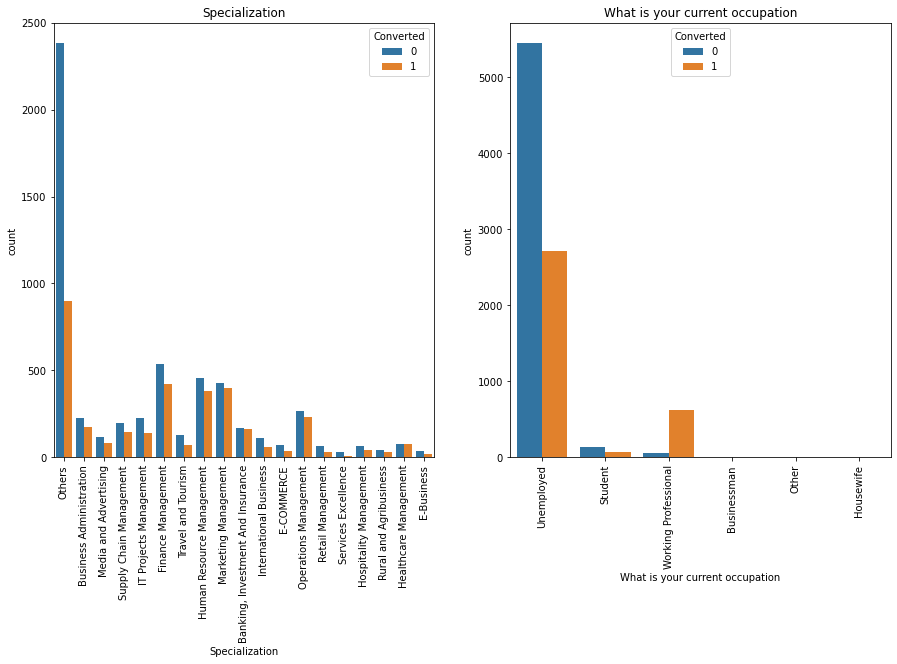

In [41]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('What is your current occupation')
plt.show()

##### Inference:

* All the Management Specializations have high conversion rate.
* Unemployed leads are most in numbers but have low conversion rate.
* Working Professionals have high chance of joining it.

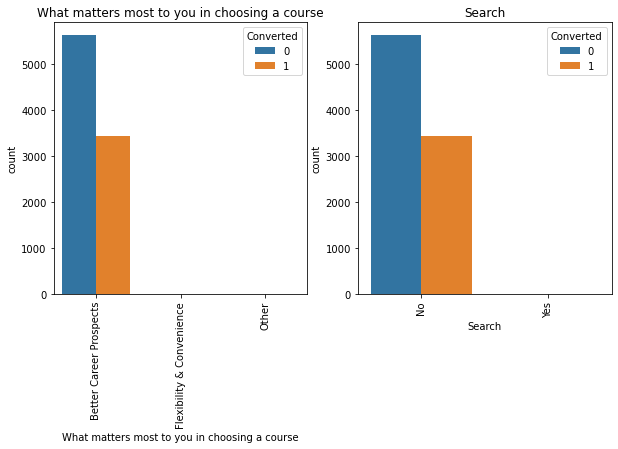

In [42]:
# Visualizing 'What matters most to you in choosing a course ' and 'Search'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Search')
plt.show()

##### Inference: 

* Better Career Prospects' matters the most to the leads.
* Nothing conclusive can be inferred from 'Search' because most of the values belongs to one category.

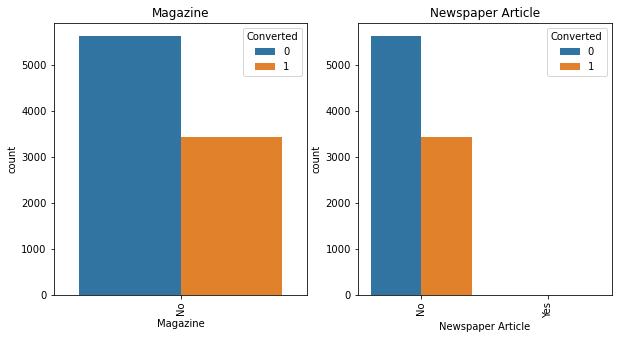

In [43]:
# Visualizing 'Magazine' and 'Newspaper Article'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Magazine', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Magazine')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper Article', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Newspaper Article')
plt.show()

##### Inference: 

Since, most of the values belongs to a single category, no inferrence can be drawn from 'Magazine' and 'Newspaper Article'

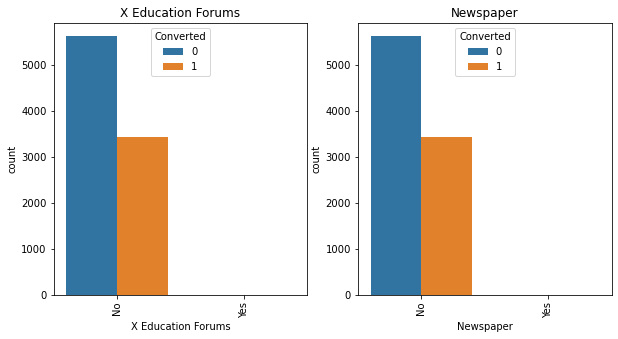

In [44]:
# Visualizing 'X Education Forums' and 'Newspaper'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='X Education Forums', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('X Education Forums')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Newspaper')
plt.show()

##### Inference:

Since, most of the values are 'No', so nothing can be inferred from 'X Education Forum' and 'Newspaper'

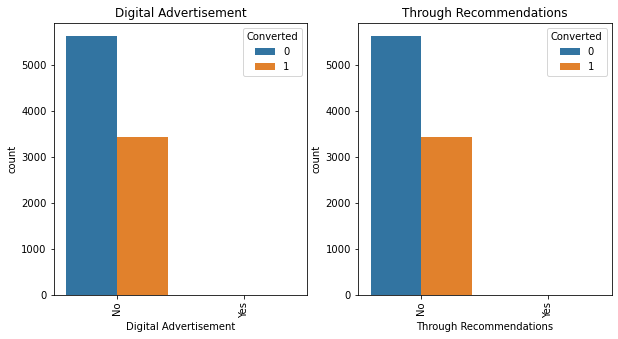

In [45]:
# Visualizing 'Digital Advertisement' and ' Through Recommendations'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Digital Advertisement', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Digital Advertisement')

plt.subplot(1,2,2)
sns.countplot(x='Through Recommendations', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Through Recommendations')
plt.show()

##### Inference: 

For the same reason, nothing can be inferred from 'Digital Advertisement' and ' Through Recommendation'

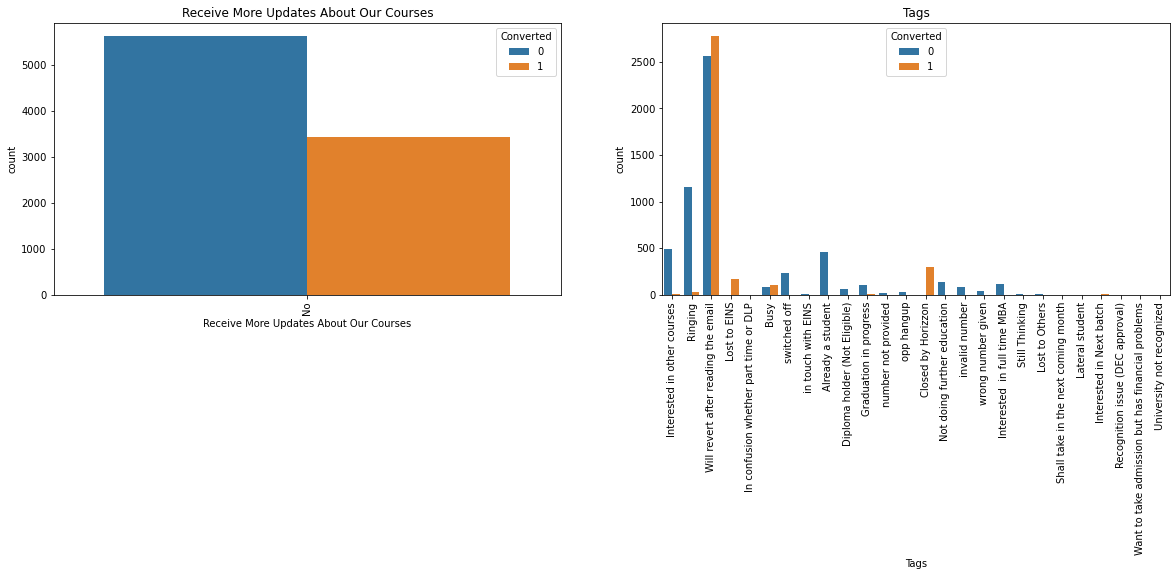

In [46]:
# Visualizind 'Receive More Updates Our Courses' and 'Tags'
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='Receive More Updates About Our Courses', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Receive More Updates About Our Courses')

plt.subplot(1,2,2)
sns.countplot(x='Tags', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Tags')
plt.show()

##### Inference: 

* 'Receive More Updates about our Courses' has nothing to infer.
* Leads who revert back after reading the email have good conversion rate

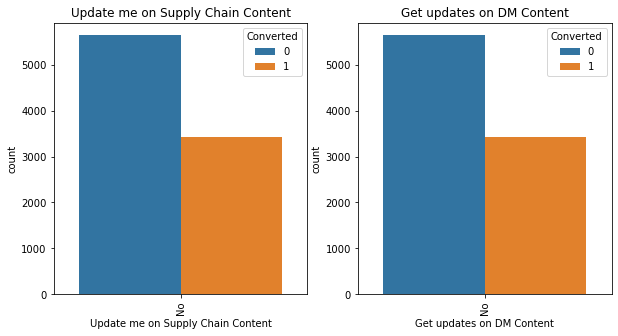

In [47]:
# Visualizing 'Update me on Supply Chain Content' and 'Get updates on DM Content'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Update me on Supply Chain Content', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Update me on Supply Chain Content')

plt.subplot(1,2,2)
sns.countplot(x='Get updates on DM Content', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Get updates on DM Content')
plt.show()

##### Inference:

Both of these variable gives no inference

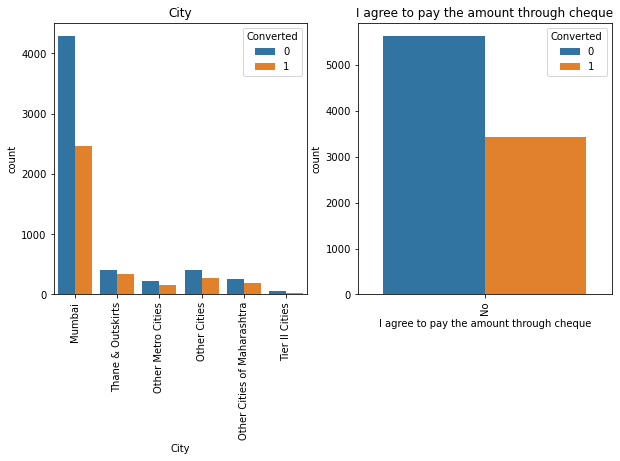

In [48]:
# Visualizing 'City' and 'I agree to pay the amount thorugh cheque'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='City', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('City')

plt.subplot(1,2,2)
sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('I agree to pay the amount through cheque')
plt.show()

##### Inference: 

* Most of the leads belongs to Mumbai and have a godd conversion rate.
* Nothing can be inferred from 'I agree to pay the amount through cheque'.

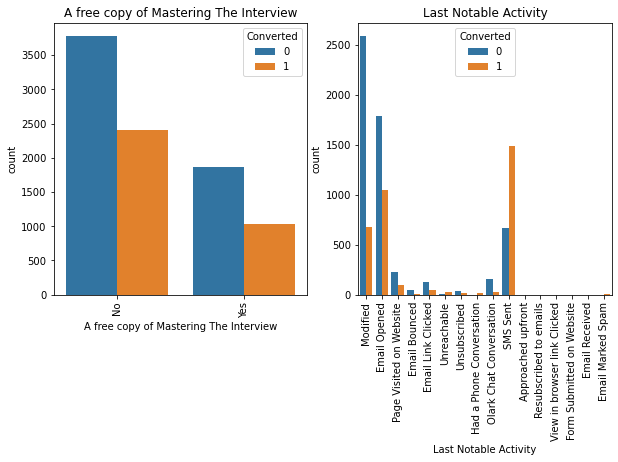

In [49]:
# Visualizing 'A free copy of Mastering The Interview' and 'Last Notable Activity'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data=leads).tick_params(axis='x', rotation=90)
plt.title('Last Notable Activity')
plt.show()

### Visualizing Numerical Variables

In [149]:
# We will drop 'Lead Number' because it gives same meaning as 'Prospect ID'
leads.drop('Lead Number', axis = 1, inplace = True)

KeyError: "['Lead Number'] not found in axis"

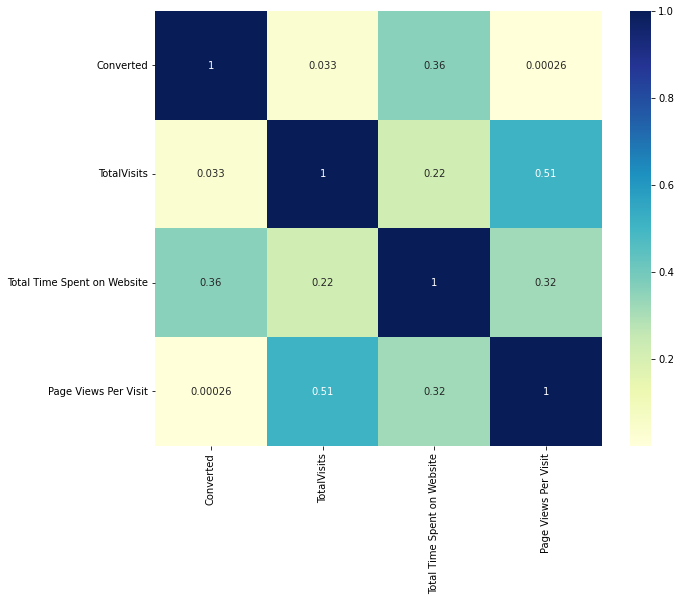

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [52]:
# Now visualize 'Total Visits'
leads['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

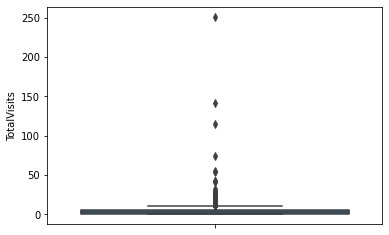

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

There is presence of Outliers. So, we will cap the outliers

In [54]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits']<=percentiles[0]]=percentiles[0]
leads['TotalVisits'][leads['TotalVisits']>=percentiles[1]]=percentiles[1]

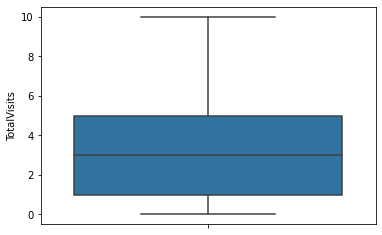

In [55]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

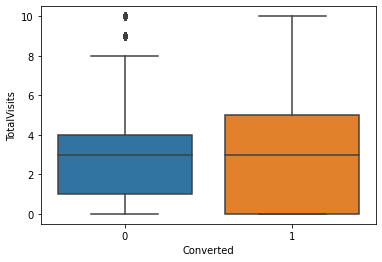

In [56]:
sns.boxplot(y='TotalVisits', x='Converted', data=leads)
plt.show()

Nothing conclusive inference we got here. Because, the median of both converted and not coverted are very much same.

In [57]:
# Visualizing 'Total Time Spent on Website'
leads['Total Time Spent on Website'].describe()


count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

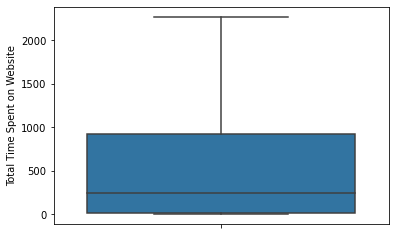

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

There is no Outlier.

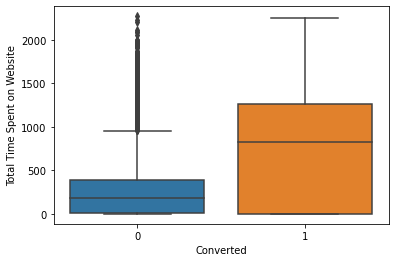

In [59]:
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=leads)
plt.show()

Here, we see that the Leads who are spending more time on the website are more likely to convert

In [60]:
# Visualizing 'Page Views Per Visit'
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

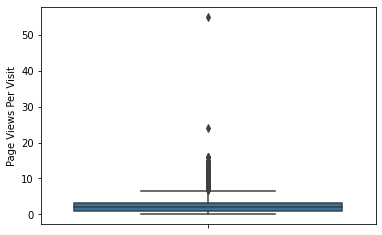

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

There is a presence of Outliers. So we will cap them

In [62]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit']<=percentiles[0]]=percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit']>=percentiles[1]]=percentiles[1]

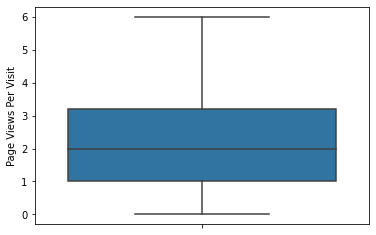

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

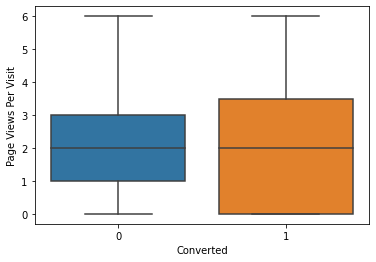

In [64]:
sns.boxplot(y='Page Views Per Visit', x='Converted', data=leads)
plt.show()

Here nothing conclusive can be inferred because, medians are very close.

### Based on the EDA we have seen that there are many columns which are not providing any useful informations and seems to be irrelevant.

### So, we will drop those columns for further analysis 

In [65]:
leads = leads.drop(['Country','What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], 1)

In [66]:
leads.shape

(9074, 15)

In [67]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Tags                

# Step 4: Data Preparation 

#### Converting some binary variables(Yes/No) to 0/1 

In [68]:
# List of variables to map

varlist = ['Do Not Email', 'Do Not Call']

# Defining map function

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

# Applying the function to the housing list

leads[varlist] = leads[varlist].apply(binary_map)

In [69]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,Modified


In [70]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Tags                

### Dummy Variable Creation 

In [71]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
# Adding the result to the master dataframe

leads = pd.concat([leads, dummy1], axis = 1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [73]:
# Dropping the original columns after dummy variable creation

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity'], axis = 1)
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# Step 5: Train-Test Split

In [74]:
# Putting feature variable to X

X = leads.drop(['Prospect ID', 'Converted'], axis = 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
# Putting the target variable to y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6: Feature Scaling

#### Using Standard Scaler, we will rescale the features 

In [77]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
# Checking the Conversion rate

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

There is a Conversion rate of almost 38%

##### Checking correlation among the variables 

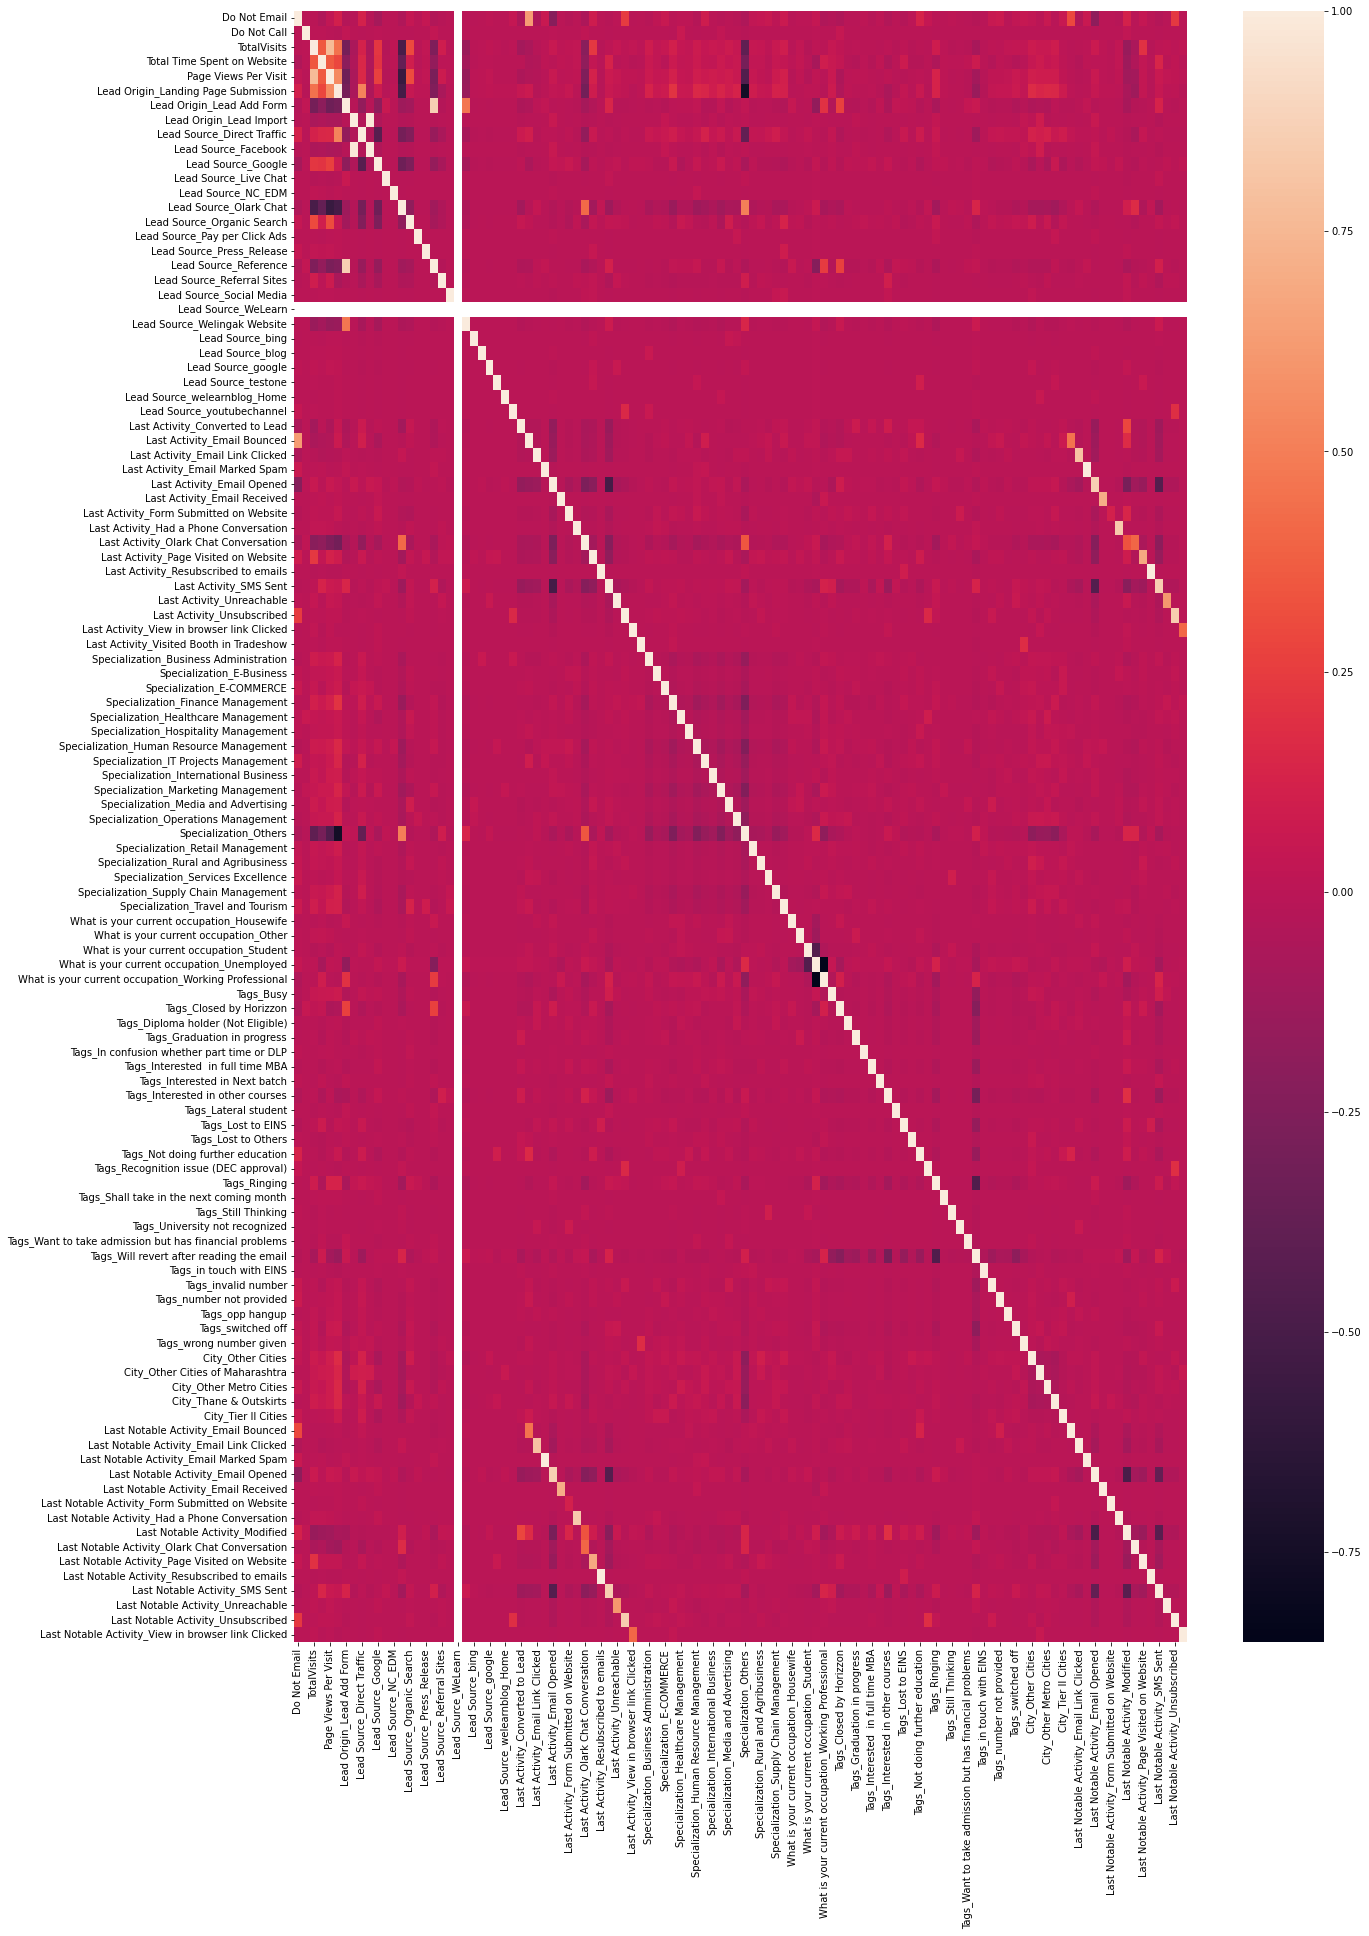

In [79]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

There are a lot of variables. So, nothing can be inferred from heatmap. Now, we will use RFE.


# Step 7: Model Building

## Feature Selection Using RFE 

In [80]:
logreg = LogisticRegression()

In [81]:
rfe = RFE(logreg, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [82]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [83]:
# List of variables selected

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 72),
 ('TotalVisits', False, 68),
 ('Total Time Spent on Website', False, 13),
 ('Page Views Per Visit', False, 66),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Source_Direct Traffic', False, 44),
 ('Lead Source_Facebook', False, 92),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Live Chat', False, 74),
 ('Lead Source_NC_EDM', False, 56),
 ('Lead Source_Olark Chat', False, 24),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Pay per Click Ads', False, 101),
 ('Lead Source_Press_Release', False, 61),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Social Media', False, 37),
 ('Lead Source_WeLearn', False, 103),
 ('Lead Source_Welingak Website', False, 5),
 ('Lead Source_bing', False, 98),
 ('Lead Source_blog', False, 39),
 ('Lead Source_google', False, 40),
 ('Lead Source_t

In [84]:
# Selected Columns
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [85]:
# Rejected Columns
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=102)

### Building 1st Model 

In [86]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2138.1
Date:                Mon, 27 Feb 2023   Deviance:                       4276.1
Time:                        22:27:43   Pearson chi2:                 1.05e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4830
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.5432      0.212    -12.008      0.000      -2.958      -2.128
Lead Origin_Lead Add Form                      2.6603      0.243     10.959      0.000       2.185       3.136
Last Activity_Had a Phone Conversation         3.0461      0.888      3.429      0.001       1.305       4.787
Last Activity_Unsubscribed                     1.0757      0.507      2.122      0.034       0.082       2.069
What is your current occupation_Unemployed    -2.6733      0.180    -14.840      0.000      -3.026      -2.320
Tags_Busy                                      3.9862      0.273     14.625      0.000       3.452       4.520
Tags_Closed by Horizzon                        9.1725      0.732     12.531      0.000       7.738      10.607
Tags_Interested in Next batch                 23.7037   1.39e+04      0.002      0.999   -2.72e+04    2.73e+04
Tags_Lost to EINS                              9.0476      0.734     12.335      0.000       7.610      10.485
Tags_Will revert after reading the email       4.3780      0.163     26.934      0.000       4.059       4.697
Last Notable Activity_SMS Sent                 2.7146      0.105     25.751      0.000       2.508       2.921
==============================================================================================================
"""

Here we see that 'Tags_Interested in Next batch' has avery high p- value. So, we will drop it and buil our next Model.

In [87]:
col = col.drop('Tags_Interested in Next batch', 1)

### Building 2nd Model 

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2146.3
Date:                Mon, 27 Feb 2023   Deviance:                       4292.6
Time:                        22:27:43   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4817
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.4992      0.209    -11.979      0.000      -2.908      -2.090
Lead Origin_Lead Add Form                      2.6691      0.242     11.042      0.000       2.195       3.143
Last Activity_Had a Phone Conversation         3.0385      0.883      3.441      0.001       1.308       4.769
Last Activity_Unsubscribed                     1.0723      0.505      2.122      0.034       0.082       2.063
What is your current occupation_Unemployed    -2.6575      0.179    -14.874      0.000      -3.008      -2.307
Tags_Busy                                      3.9204      0.271     14.491      0.000       3.390       4.451
Tags_Closed by Horizzon                        9.1126      0.731     12.463      0.000       7.680      10.546
Tags_Lost to EINS                              8.9879      0.733     12.267      0.000       7.552      10.424
Tags_Will revert after reading the email       4.3170      0.159     27.194      0.000       4.006       4.628
Last Notable Activity_SMS Sent                 2.7264      0.105     25.867      0.000       2.520       2.933
==============================================================================================================
"""

#### The p-values are significant for each variable. 

#### Now, we will check for VIF values 

In [89]:
# Create a dataframe that will contain the names of all feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.17
4,Tags_Busy,1.07
6,Tags_Lost to EINS,1.04
2,Last Activity_Unsubscribed,1.01
1,Last Activity_Had a Phone Conversation,1.00
0,Lead Origin_Lead Add Form,0.50
7,Tags_Will revert after reading the email,0.11
3,What is your current occupation_Unemployed,0.03
8,Last Notable Activity_SMS Sent,0.01


#### S0, the VIF values are also significant. 

### Thus, we can conclude that this model is good

Now, we do not need to drop any more variables and we can proceed with making predictions using this model only.

# Step 8: Predictions on the Train set

In [90]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.301583
1012    0.860295
9226    0.005727
4750    0.868370
7987    0.978775
1281    0.868370
2880    0.301583
4971    0.816086
7536    0.301583
1248    0.005727
dtype: float64

In [91]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30158272, 0.86029539, 0.00572747, 0.86837025, 0.97877519,
       0.86837025, 0.30158272, 0.81608567, 0.30158272, 0.00572747])

Creating a dataframe with actual Converted flag and predicted probabilities

In [92]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.301583,3009
1,0,0.860295,1012
2,0,0.005727,9226
3,1,0.868370,4750
4,1,0.978775,7987


Let's take a cutoff of 0.5 for the probability to check the Predicted labels

In [93]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.301583,3009,0
1,0,0.860295,1012,1
2,0,0.005727,9226,0
3,1,0.868370,4750,1
4,1,0.978775,7987,1


In [94]:
# Lets have a look ate Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3751,  154],
       [ 741, 1705]])

In [95]:
# Checking overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8590773106597386

## Metrics beyond simply accuracy 

In [96]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the Sensitivity of our Logistic Regression Model

print("Sensitivity: ",TP/float(TP+FN))

Sensitivity:  0.697056418642682


In [98]:
# Lets calculate Specificity

print("Specificity: ", TN/float(TN+FP))

Specificity:  0.9605633802816902


In [99]:
# Lets calculate False Positive Rate: predicting conversion when leads does not convert

print("False Positive Rate: ",FP/float(TN+FP))

False Positive Rate:  0.03943661971830986


In [100]:
# Positive predictive value
print("Positive Predictive Value: ",TP/float(TP+FP))

Positive Predictive Value:  0.9171597633136095


In [101]:
# Negative prdictive value
print("Negative Predictive Value: ",TN/float(TN+FN))

Negative Predictive Value:  0.835040071237756


From the above calculations, we have found that the Specificity is good(96%), but the Sensitivity is only about 70%. We need to take care of it.

The reason behind the low Sensitivity is that we chose the cuff-off 0.5. This cut-off pint should be optimised to get a desect value of Sensitivity. For that, we nee the ROC Curve.

# Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a       decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the     test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

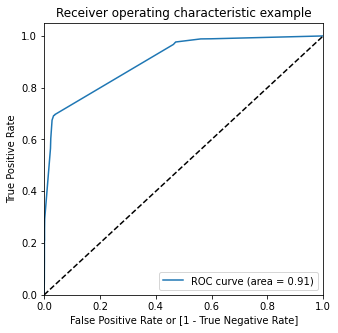

In [104]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### The area under the ROC Curve shoul be close to 1 

### Since, the area under the ROC Curve is high(0.91) and very close to 1, our model is a good one. 

# Step 10: FInding Optimal Cutoff Point

Optimal cutoff probability is the probability where we get a balanced Sensitivity and Specificity.

In the above calculations, we had chosen an arbitrary cut-off 0.5. Now, we have to determine the best cut-off value.

In [105]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.301583,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.860295,1012,1,1,1,1,1,1,1,1,1,1,0
2,0,0.005727,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.868370,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.978775,7987,1,1,1,1,1,1,1,1,1,1,1


In [106]:
# Now Let's calculate Accuracy, Sensitivity and Specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.700992  0.976697  0.528297
0.2   0.2  0.701307  0.976697  0.528809
0.3   0.3  0.702567  0.967294  0.536748
0.4   0.4  0.859077  0.697056  0.960563
0.5   0.5  0.859077  0.697056  0.960563
0.6   0.6  0.860809  0.692559  0.966197
0.7   0.7  0.860809  0.692559  0.966197
0.8   0.8  0.860809  0.692559  0.966197
0.9   0.9  0.727602  0.295993  0.997951


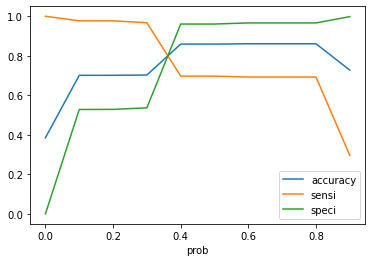

In [107]:
# Let's plot Accuracy, Sensitivity and Specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the above curve, 0.35 is the optimum point to take it as a cutoff probability 

In [108]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.301583,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.860295,1012,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.005727,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.868370,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.978775,7987,1,1,1,1,1,1,1,1,1,1,1,1


Assigning Lead Score:

In [109]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.301583,3009,0,30
1,0,0.860295,1012,1,86
2,0,0.005727,9226,0,1
3,1,0.868370,4750,1,87
4,1,0.978775,7987,1,98


In [110]:
# Let's check overall accuracy

print("Accuracy: ", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

Accuracy:  0.8590773106597386


In [111]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion2

array([[3751,  154],
       [ 741, 1705]])

In [112]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negatives

In [113]:
# Sensitivity of Logistic Regression Model
print("Sensitivity: ", TP/float(TP+FN))

Sensitivity:  0.697056418642682


In [114]:
# Specificity
print("Specificity: ", TN/float(TN+FP))

Specificity:  0.9605633802816902


INFERENCE:
* The ROC Curve has a value of 0.91
* Accuracy is 85.9%
* Sensitivity is 69.7%
* Specificity is 96%
So, these values indicates that the model is performing well.

Let's check other stats as well.

In [115]:
# False positive rate
print("False Positive Rate: ", FP/float(TN+FP))

False Positive Rate:  0.03943661971830986


In [116]:
# Positive Predictive Value
print("Positive predctive value: ", TP/float(TP+FP))

Positive predctive value:  0.9171597633136095


In [117]:
# Negative predictive value
print("Negative Predictive Value: ", TN/float(TN+FN))

Negative Predictive Value:  0.835040071237756


## Precision and Recall 

In [118]:
# Checking Confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[3751,  154],
       [ 741, 1705]])

### Precision

In [119]:
# Precision
TP/TP+FP
print("Precision: ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision:  0.9171597633136095


In [120]:
# Recall
TP/TP+FN
print("Recall: ", confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall:  0.697056418642682


In [121]:
print("Precision Score: ", precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

Precision Score:  0.9171597633136095


In [122]:
print("Recall Score: ", recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

Recall Score:  0.697056418642682


### Precision and Recall Trade-off 

In [123]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: final_Predicted, Length: 6351, dtype: int64)

In [124]:
# Creating precision recall curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

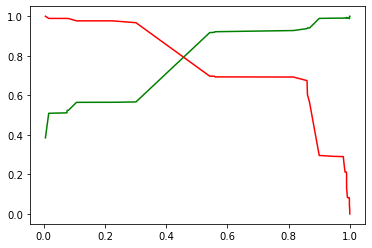

In [125]:
# Plotting the tradeoff curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11: Making Predictions on the Test Set

In [126]:
# Scaling the Test set

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.304501,-0.591008,0.998931,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.666261,1.894051,1.564920,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.419021,-0.743117,-0.133048,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.751544,-0.578179,2.130909,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Last Activity_Had a Phone Conversation,Last Activity_Unsubscribed,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
3271,0,0,0,1,0,0,0,1,0
1490,0,0,0,0,0,0,0,1,0
7936,0,0,0,1,0,0,0,1,0
4216,1,0,0,0,0,1,0,0,0
3830,0,0,0,1,0,0,0,1,0


In [128]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [129]:
# Shape of the Test set
X_test_sm.shape

(2723, 10)

Making Predictions on the Test set

In [130]:
y_test_pred = res.predict(X_test_sm)

In [131]:
y_test_pred[:10]

3271    0.301583
1490    0.860295
7936    0.301583
4216    0.999907
3830    0.301583
1800    0.860295
6507    0.080888
4821    0.005727
4223    0.989603
4714    0.301583
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.301583
1490,0.860295
7936,0.301583
4216,0.999907
3830,0.301583


In [133]:
# Converting y_test to a dataframe

y_test_df = pd.DataFrame(y_test)

In [134]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [135]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [136]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.301583
1,1,1490,0.860295
2,0,7936,0.301583
3,1,4216,0.999907
4,0,3830,0.301583


In [137]:
# Renaming the Column

y_pred_final = y_pred_final.rename(columns={0: 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.301583
1,1,1490,0.860295
2,0,7936,0.301583
3,1,4216,0.999907
4,0,3830,0.301583


### Assigning a Lead Score

Rearranging the Columns and assign the Lead Score

In [138]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead Score
0,3271,0,0.301583,30
1,1490,1,0.860295,86
2,7936,0,0.301583,30
3,4216,1,0.999907,100
4,3830,0,0.301583,30


In [139]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead Score,final_Predicted
0,3271,0,0.301583,30,0
1,1490,1,0.860295,86,1
2,7936,0,0.301583,30,0
3,4216,1,0.999907,100,1
4,3830,0,0.301583,30,0


Overall Accuracy

In [140]:
# Let's check overall Accuracy
print("Accuracy: ", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted))

Accuracy:  0.8475945648182152


In [141]:
# Confusion Matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
confusion2

array([[1656,   78],
       [ 337,  652]])

In [142]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negatives

SENSITIVITY

In [143]:
# Sensitivity of our Logistic Regression Model
print("Sensitivity: ", TP/float(TP+FN))

Sensitivity:  0.6592517694641051


SPECIFICITY

In [144]:
# Specificity
print("Specificity: ", TN/float(TN+FP))

Specificity:  0.9550173010380623


### Precision and Recall for the Test set 

In [145]:
# Precision for the test set
precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8931506849315068

In [146]:
# Recall for the test set
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.6592517694641051

Finding the leads to be contacted: The leads having a Lead Score equal to or greater than 80 can be considered ah Hot Leads.

In [147]:
hot_leads = y_pred_final.loc[y_pred_final['Lead Score']>=80]
hot_leads

,Prospect ID,Converted,Converted_prob,Lead Score,final_Predicted
1,1490,1,0.860295,86,1
3,4216,1,0.999907,100,1
5,1800,1,0.860295,86,1
8,4223,1,0.989603,99,1
10,3977,1,0.868370,87,1
...,...,...,...,...,...
2699,6461,1,0.868370,87,1
2703,5741,1,0.868370,87,1
2715,6299,1,0.816086,82,1
2716,7852,1,0.868370,87,1


So, 714 Leads are there who have a high chance of getting converted and can be contacted.

Important Features of the Final Model:

In [148]:
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                       9.112628
Tags_Lost to EINS                             8.987868
Tags_Will revert after reading the email      4.316965
Tags_Busy                                     3.920389
Last Activity_Had a Phone Conversation        3.038546
Last Notable Activity_SMS Sent                2.726398
Lead Origin_Lead Add Form                     2.669115
Last Activity_Unsubscribed                    1.072336
const                                        -2.499219
What is your current occupation_Unemployed   -2.657518
dtype: float64

### INFERENCE :

After running the model on the Test Set we have:
* Accuracy: 84.75%
* Sensitivity: 66%
* Specificity: 95.5%

### RESULTS: 

Comparing the values obtained for the Train and Test set:

Train Data:
* Accuracy: 85.9%
* Sensitivity: 69.7%
* Specificity: 96%

Test Data:
* Accuracy: 84.75%
* Sensitivity: 66%
* Specificity: 95.5%

### CONCLUSION:

* The Accuracy, Sensitivity, Specificity of the Test set are very close to their respective values of the Train set.
* The Optimal cut-off is considered on the basis of Sensitivity and Specificity.
* We have got 714 Leads who have a high chance of getting converted.
* The overall Accuracy of the model is very good.

Hence this model seems to be good.

### Recommendation:

The company should focus on these variables:
* Tags
* Last Activity
* Lead Origin
* Last Notable Activity